## **NAUFAL ALIF ANARGYA/2311110041/SD-04-01**

## No. 1 Imputasi missing value dengan mean, median, dan modus

In [5]:
import pandas as pd

data = pd.read_csv('diabetes.csv')

mean_imputation_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
median_imputation_columns = ['Age']

for col in mean_imputation_columns:
    data[col].fillna(data[col].mean(), inplace=True)

for col in median_imputation_columns:
    data[col].fillna(data[col].median(), inplace=True)

print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## No. 2 Cek korelasi antar variabel dengan heatmap

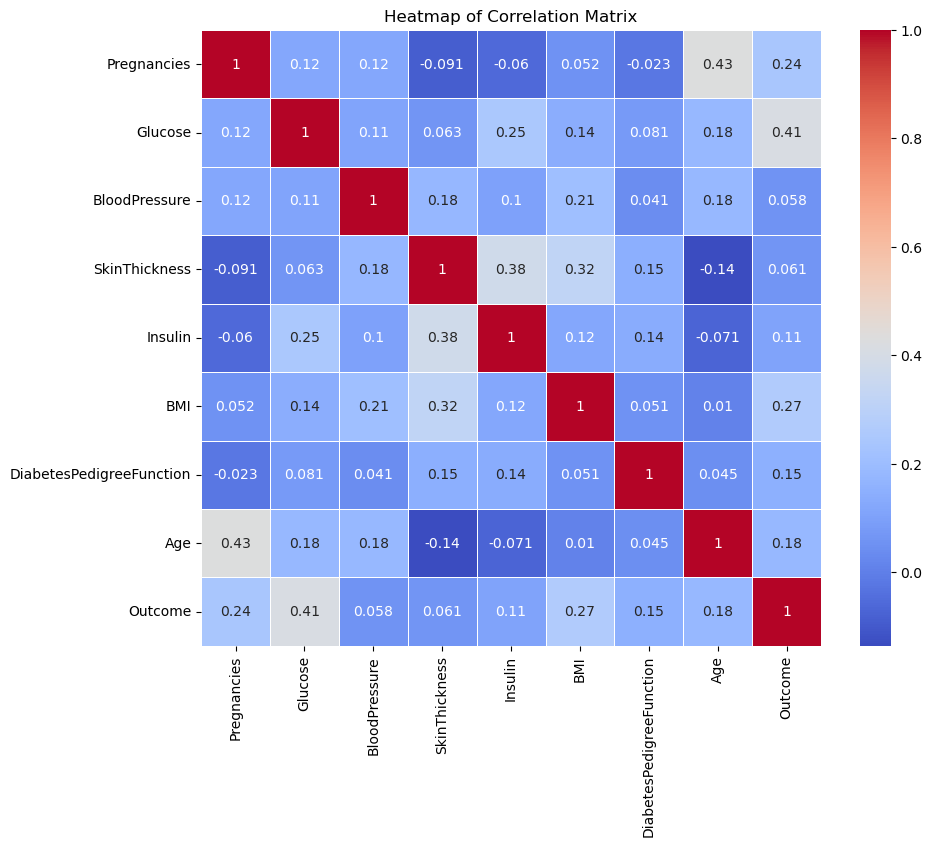

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


## No. 3 dan 4 

In [15]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler, MinMaxScaler

data = pd.read_csv('C:/Prak. IPSD/Assignment/Tugas 2/diabetes.csv')

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

data_mean = data.copy()
data_median = data.copy()
data_mode = data.copy()

columns_to_impute = data.columns[data.isnull().any()]

data_mean[columns_to_impute] = mean_imputer.fit_transform(data[columns_to_impute])
data_median[columns_to_impute] = median_imputer.fit_transform(data[columns_to_impute])
data_mode[columns_to_impute] = mode_imputer.fit_transform(data[columns_to_impute])

majority_class = data_mean[data_mean.Outcome == 0]
minority_class = data_mean[data_mean.Outcome == 1]

minority_class_count = len(minority_class)
majority_class_undersampled = resample(majority_class, 
                                       replace=False, 
                                       n_samples=minority_class_count, 
                                       random_state=42)

balanced_data = pd.concat([majority_class_undersampled, minority_class])

robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

features = balanced_data.drop(columns=['Outcome'])
features_robust_scaled = robust_scaler.fit_transform(features)
features_minmax_scaled = minmax_scaler.fit_transform(features)

robust_scaled_df = pd.DataFrame(features_robust_scaled, columns=features.columns)
minmax_scaled_df = pd.DataFrame(features_minmax_scaled, columns=features.columns)

robust_scaled_df['Outcome'] = balanced_data['Outcome'].values
minmax_scaled_df['Outcome'] = balanced_data['Outcome'].values

print("Robust Scaled Data:")
print(robust_scaled_df.head())
print("\nMin-Max Scaled Data:")
print(minmax_scaled_df.head())


Robust Scaled Data:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.560637 -0.710984       0.086726        0.56250  0.000000  0.000000   
1     0.239363  0.000000      -1.746607       -0.68750 -0.807123  0.416176   
2    -0.160637 -0.286742      -0.913274        0.28125 -0.345181 -0.608215   
3    -0.360637  0.258713       1.253393       -0.68750 -0.807123 -0.974068   
4     0.639363 -0.559469       0.420060        0.56250  0.000000  1.269834   

   DiabetesPedigreeFunction       Age  Outcome  
0                 -0.590302 -0.263844        0  
1                  0.635278 -0.680510        0  
2                  0.005622 -0.930510        0  
3                 -0.404779 -0.513844        0  
4                 -0.629656  0.000000        0  

Min-Max Scaled Data:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.487437       0.614035       0.404040  0.141581  0.476806   
1     0.294118  0.605339       0.421053